# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [2]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


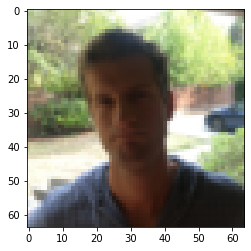

In [4]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [26]:
model = Sequential() #Specifying the input shape

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
#model.add(BatchNormalization())
model.add(Flatten())
#model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 31, 31, 64)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 12544)           

In [27]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

In [42]:
history_model = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=100)

Epoch 1/5
6/6 [==============================] - 3s 456ms/step - loss: 0.1517 - accuracy: 0.9467 - val_loss: 0.2348 - val_accuracy: 0.9067
Epoch 2/5
6/6 [==============================] - 2s 325ms/step - loss: 0.1367 - accuracy: 0.9567 - val_loss: 0.2786 - val_accuracy: 0.8933
Epoch 3/5
6/6 [==============================] - 2s 331ms/step - loss: 0.2030 - accuracy: 0.9100 - val_loss: 0.2462 - val_accuracy: 0.9133
Epoch 4/5
6/6 [==============================] - 2s 329ms/step - loss: 0.1827 - accuracy: 0.9167 - val_loss: 0.2777 - val_accuracy: 0.9067
Epoch 5/5
6/6 [==============================] - 2s 311ms/step - loss: 0.1776 - accuracy: 0.9283 - val_loss: 0.2254 - val_accuracy: 0.9200


# Evaluate / Test

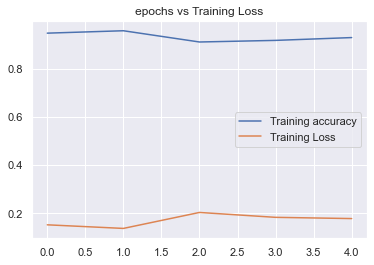

In [43]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

[]

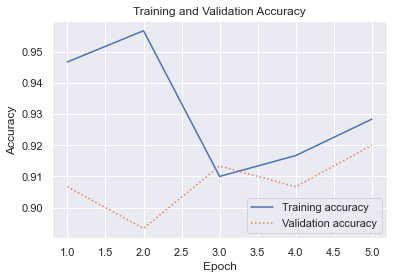

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = history_model.history['accuracy']
val = history_model.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Evaluate Test set

In [45]:
# Code Here
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

5/5 [==============================] - 0s 24ms/step - loss: 0.2254 - accuracy: 0.9200
Test loss: 0.2254 accuracy: 0.9200


In [46]:
evaluation = model.evaluate(X_test, Y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

5/5 [==============================] - 0s 37ms/step - loss: 0.2254 - accuracy: 0.9200
Test Accuracy : 0.920


Confusion Matrix

In [47]:
predicted_classes = predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 31ms/step


In [48]:
print("predicted_classes shape : ", predicted_classes.shape)
print("y_test shape : ", Y_test.shape)

predicted_classes shape :  (150, 1)
y_test shape :  (150, 1)


In [49]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        66
           1       0.92      0.94      0.93        84

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150



<AxesSubplot:>

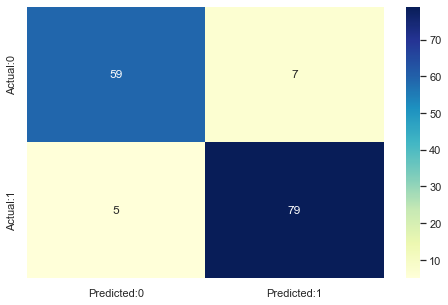

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
cm=confusion_matrix(Y_test,predicted_classes)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# Note

Before you submit your work 

* You should compare different optimizers

---

* Display images with Predicted & expected labels (Happy-sad)


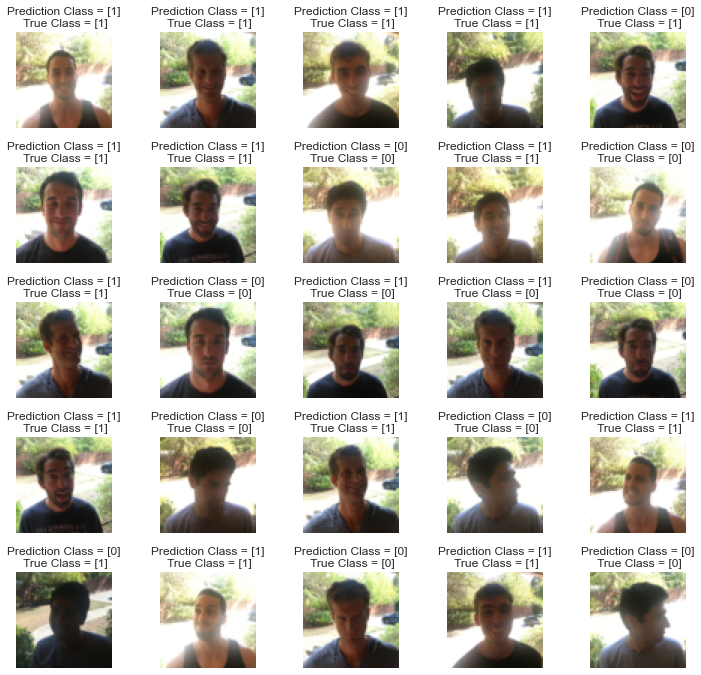

In [51]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(predicted_classes[i], Y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)